In [483]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.datasets import make_regression
from numpy import loadtxt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline
plt.style.use('seaborn')
import requests
import re
import time
import statsmodels.api as sm
import scipy.stats as stats
import scipy as sp
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

Reading the Datasets from Basketball Reference below, and then merging them into one dataset. The data for playoff wins and playoff win percentage for each team was added manually by Aadrij Upadya.

In [484]:
df_2021 = pd.read_csv("/content/2020-2021 - Sheet1.csv")
df_2020 = pd.read_csv("/content/2019-2020 - Sheet1.csv")
df_2019 = pd.read_csv("/content/2018-2019 - Sheet1.csv")
df_2018 = pd.read_csv("/content/2017-2018 - Sheet1.csv")
df_2017 = pd.read_csv("/content/2016-2017 - Sheet1.csv")
df_2016 = pd.read_csv("/content/2015-2016 - Sheet1.csv")
df_2015 = pd.read_csv("/content/2014-2015 - Sheet1.csv")

df_2021['Year'] = [2021 for x in range(len(df_2021.index))]
df_2020['Year'] = [2020 for x in range(len(df_2020.index))]
df_2019['Year'] = [2019 for x in range(len(df_2019.index))]
df_2018['Year'] = [2018 for x in range(len(df_2018.index))]
df_2017['Year'] = [2017 for x in range(len(df_2017.index))]
df_2016['Year'] = [2016 for x in range(len(df_2016.index))]
df_2015['Year'] = [2015 for x in range(len(df_2015.index))]

frames = [df_2021, df_2020, df_2019, df_2018, df_2017, df_2016, df_2015]
metadata = pd.concat(frames)

metadata = metadata.drop(columns=['Unnamed: 17', 'Unnamed: 22', 'Unnamed: 27', 'Unnamed: 21'])
metadata['Index'] = [x for x in range(len(metadata.index))]
metadata = metadata.set_index('Index')

cnt = 0
for team in metadata['Team']:
    if '*' not in str(team):
        metadata = metadata.drop(cnt)
    cnt+=1

metadata['Index'] = [x for x in range(len(metadata.index))]
metadata = metadata.set_index('Index')

from IPython.display import display
with pd.option_context('display.max_rows', 250):
    display(metadata)

metadata['Playoff Wins'] = [6,10,14,16,7,4,7,2,3,1,10,2,1,1,0,1,5,10,7,7,16,2,14,5,3,0,9,0,3,0,1,1,10,14,16,1,6,5,8,7,0,1,7,3,2,1,1,0,11,4,16,5,5,11,2,1,0,1,3,5,12,2,1,3,16,8,6,4,3,4,13,9,7,1,2,2,0,2,0,2,6,15,11,16,10,2,4,2,3,7,3,5,0,1,1,0,16,7,3,8,14,1,9,6,0,6,1,0,6,2,0,2]
metadata['Playoff Win Percentage'] = [0.545,0.526,0.636,0.696,0.583,0.400,0.583,0.333,0.429,0.200,0.556,0.333,0.200,0.200,0,0.200,0.500,0.588,0.538,0.636,0.762,0.333,0.667,0.417,0.429,0,0.474,0,0.429,0,0.200,0.200,0.667,0.636,0.667,0.200,0.545,0.556,0.500,0.500,0,0.200,0.583,0.429,0.333,0.200,0.200,0,0.647,0.400,0.762,0.455,0.500,0.579,0.333,0.200,0,0.200,0.429,0.556,0.545,0.333,0.200,0.429,0.941,0.500,0.545,0.400,0.429,0.364,0.722,0.500,0.538,0.200,0.333,0.333,0,0.333,0,0.333,0.600,0.625,0.611,0.762,0.500,0.333,0.400,0.333,0.429,0.500,0.429,0.455,0,0.200,0.200,0,0.762,0.500,0.429,0.500,0.700,0.200,0.529,0.545,0,0.500,0.200,0,0.600,0.333,0,0.33]


,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,...,ORB%,FT/FGA,deFG%,dTOV%,dDRB%,dFT/FGA,Arena,Attend.,Attend./G,Year
Index,,,,,,,,,,,,,,,,,,,,,
0,1.0,Utah Jazz*,28.5,52.0,20.0,55.0,17.0,9.25,-0.29,8.97,...,24.5,0.195,0.507,10.3,79.3,0.159,Vivint Smart Home Arena,151300.0,4203.0,2021
1,2.0,Los Angeles Clippers*,28.8,47.0,25.0,49.0,23.0,6.18,-0.16,6.02,...,22.7,0.186,0.531,11.9,79.1,0.186,STAPLES Center,13901.0,386.0,2021
2,3.0,Phoenix Suns*,26.6,51.0,21.0,49.0,23.0,5.82,-0.15,5.67,...,20.8,0.177,0.534,12.4,78.5,0.194,Phoenix Suns Arena,104027.0,2890.0,2021
3,4.0,Milwaukee Bucks*,28.1,46.0,26.0,48.0,24.0,5.89,-0.32,5.57,...,23.3,0.177,0.536,11.5,79.7,0.157,Fiserv Forum,64780.0,1799.0,2021
4,5.0,Philadelphia 76ers*,27.1,49.0,23.0,48.0,24.0,5.58,-0.31,5.28,...,23.2,0.225,0.521,13.8,78.2,0.200,Wells Fargo Center,68583.0,1905.0,2021
5,6.0,Denver Nuggets*,26.1,47.0,25.0,47.0,25.0,4.93,-0.11,4.82,...,24.7,0.176,0.545,12.9,78.9,0.200,Ball Arena,54563.0,1516.0,2021
6,7.0,Brooklyn Nets*,28.2,48.0,24.0,46.0,26.0,4.50,-0.27,4.24,...,21.4,0.208,0.531,11.1,77.3,0.187,Barclays Center,30491.0,847.0,2021
7,8.0,Los Angeles Lakers*,28.2,42.0,30.0,42.0,30.0,2.79,-0.03,2.77,...,22.5,0.200,0.526,13.7,79.7,0.184,STAPLES Center,23313.0,648.0,2021
8,9.0,Dallas Mavericks*,26.3,42.0,30.0,41.0,31.0,2.26,-0.01,2.26,...,21.1,0.189,0.534,11.5,77.8,0.197,American Airlines Center,94849.0,2635.0,2021


In [485]:
non_str_data = metadata.drop(columns=['Team','Arena','Year','Attend.'])
metadata.to_csv('metadata.csv')
np.set_printoptions(suppress=True)

non_str_data.to_csv('non_str_data.csv')

In [486]:
dataset = pd.read_csv('/content/non_str_data.csv')

The advanced statistics will be used to predict playoff win percentage using the XGBoost Regressor.

In [497]:
X = dataset.iloc[:,1:26]
Y = dataset.iloc[:,27:28]

In [488]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=40)

In [489]:
model = XGBRegressor(subsample=0.6, n_estimators=500, max_depth=3, learning_rate=0.01, colsample_bytree=0.7, colsample_bylevel=0.6)

In [490]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

[20:38:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [491]:
r2_score(y_pred, y_test)

0.2148287280873038

In [492]:
predictions = [round(value,2) for value in y_pred]
print(predictions)
print(mean_squared_error(y_test,predictions))

[0.57, 0.31, 0.52, 0.24, 0.52, 0.21, 0.17, 0.55, 0.23, 0.68, 0.47, 0.59, 0.58, 0.59, 0.31, 0.45, 0.24, 0.67, 0.35, 0.21, 0.55, 0.46, 0.38, 0.19, 0.4, 0.46, 0.33, 0.53]
0.01844675006066918


(29.5, -0.5)

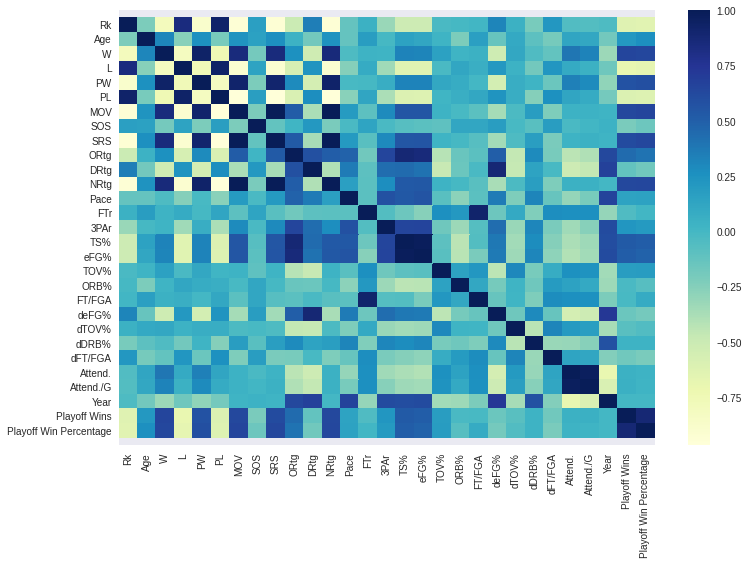

In [493]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(metadata.corr(), ax=ax, cmap='YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Below, we can see which statistics are correlated with playoff win percentage.

In [494]:
corr = metadata.corr()
abs(corr).sort_values(by = 'Playoff Win Percentage', ascending = False)['Playoff Win Percentage']

Playoff Win Percentage    1.000000
Playoff Wins              0.879628
L                         0.673815
MOV                       0.648576
NRtg                      0.646409
SRS                       0.643456
W                         0.639723
Rk                        0.639478
PL                        0.620249
PW                        0.597710
TS%                       0.512179
eFG%                      0.487065
ORtg                      0.405773
Age                       0.269147
dFT/FGA                   0.209207
3PAr                      0.204822
TOV%                      0.191760
deFG%                     0.190735
DRtg                      0.172768
SOS                       0.157209
Pace                      0.151618
FT/FGA                    0.088354
ORB%                      0.070148
dTOV%                     0.050709
dDRB%                     0.038319
Attend.                   0.032076
Attend./G                 0.029581
FTr                       0.015011
Year                

The correlation between different stats are visible using a scatter matrix.

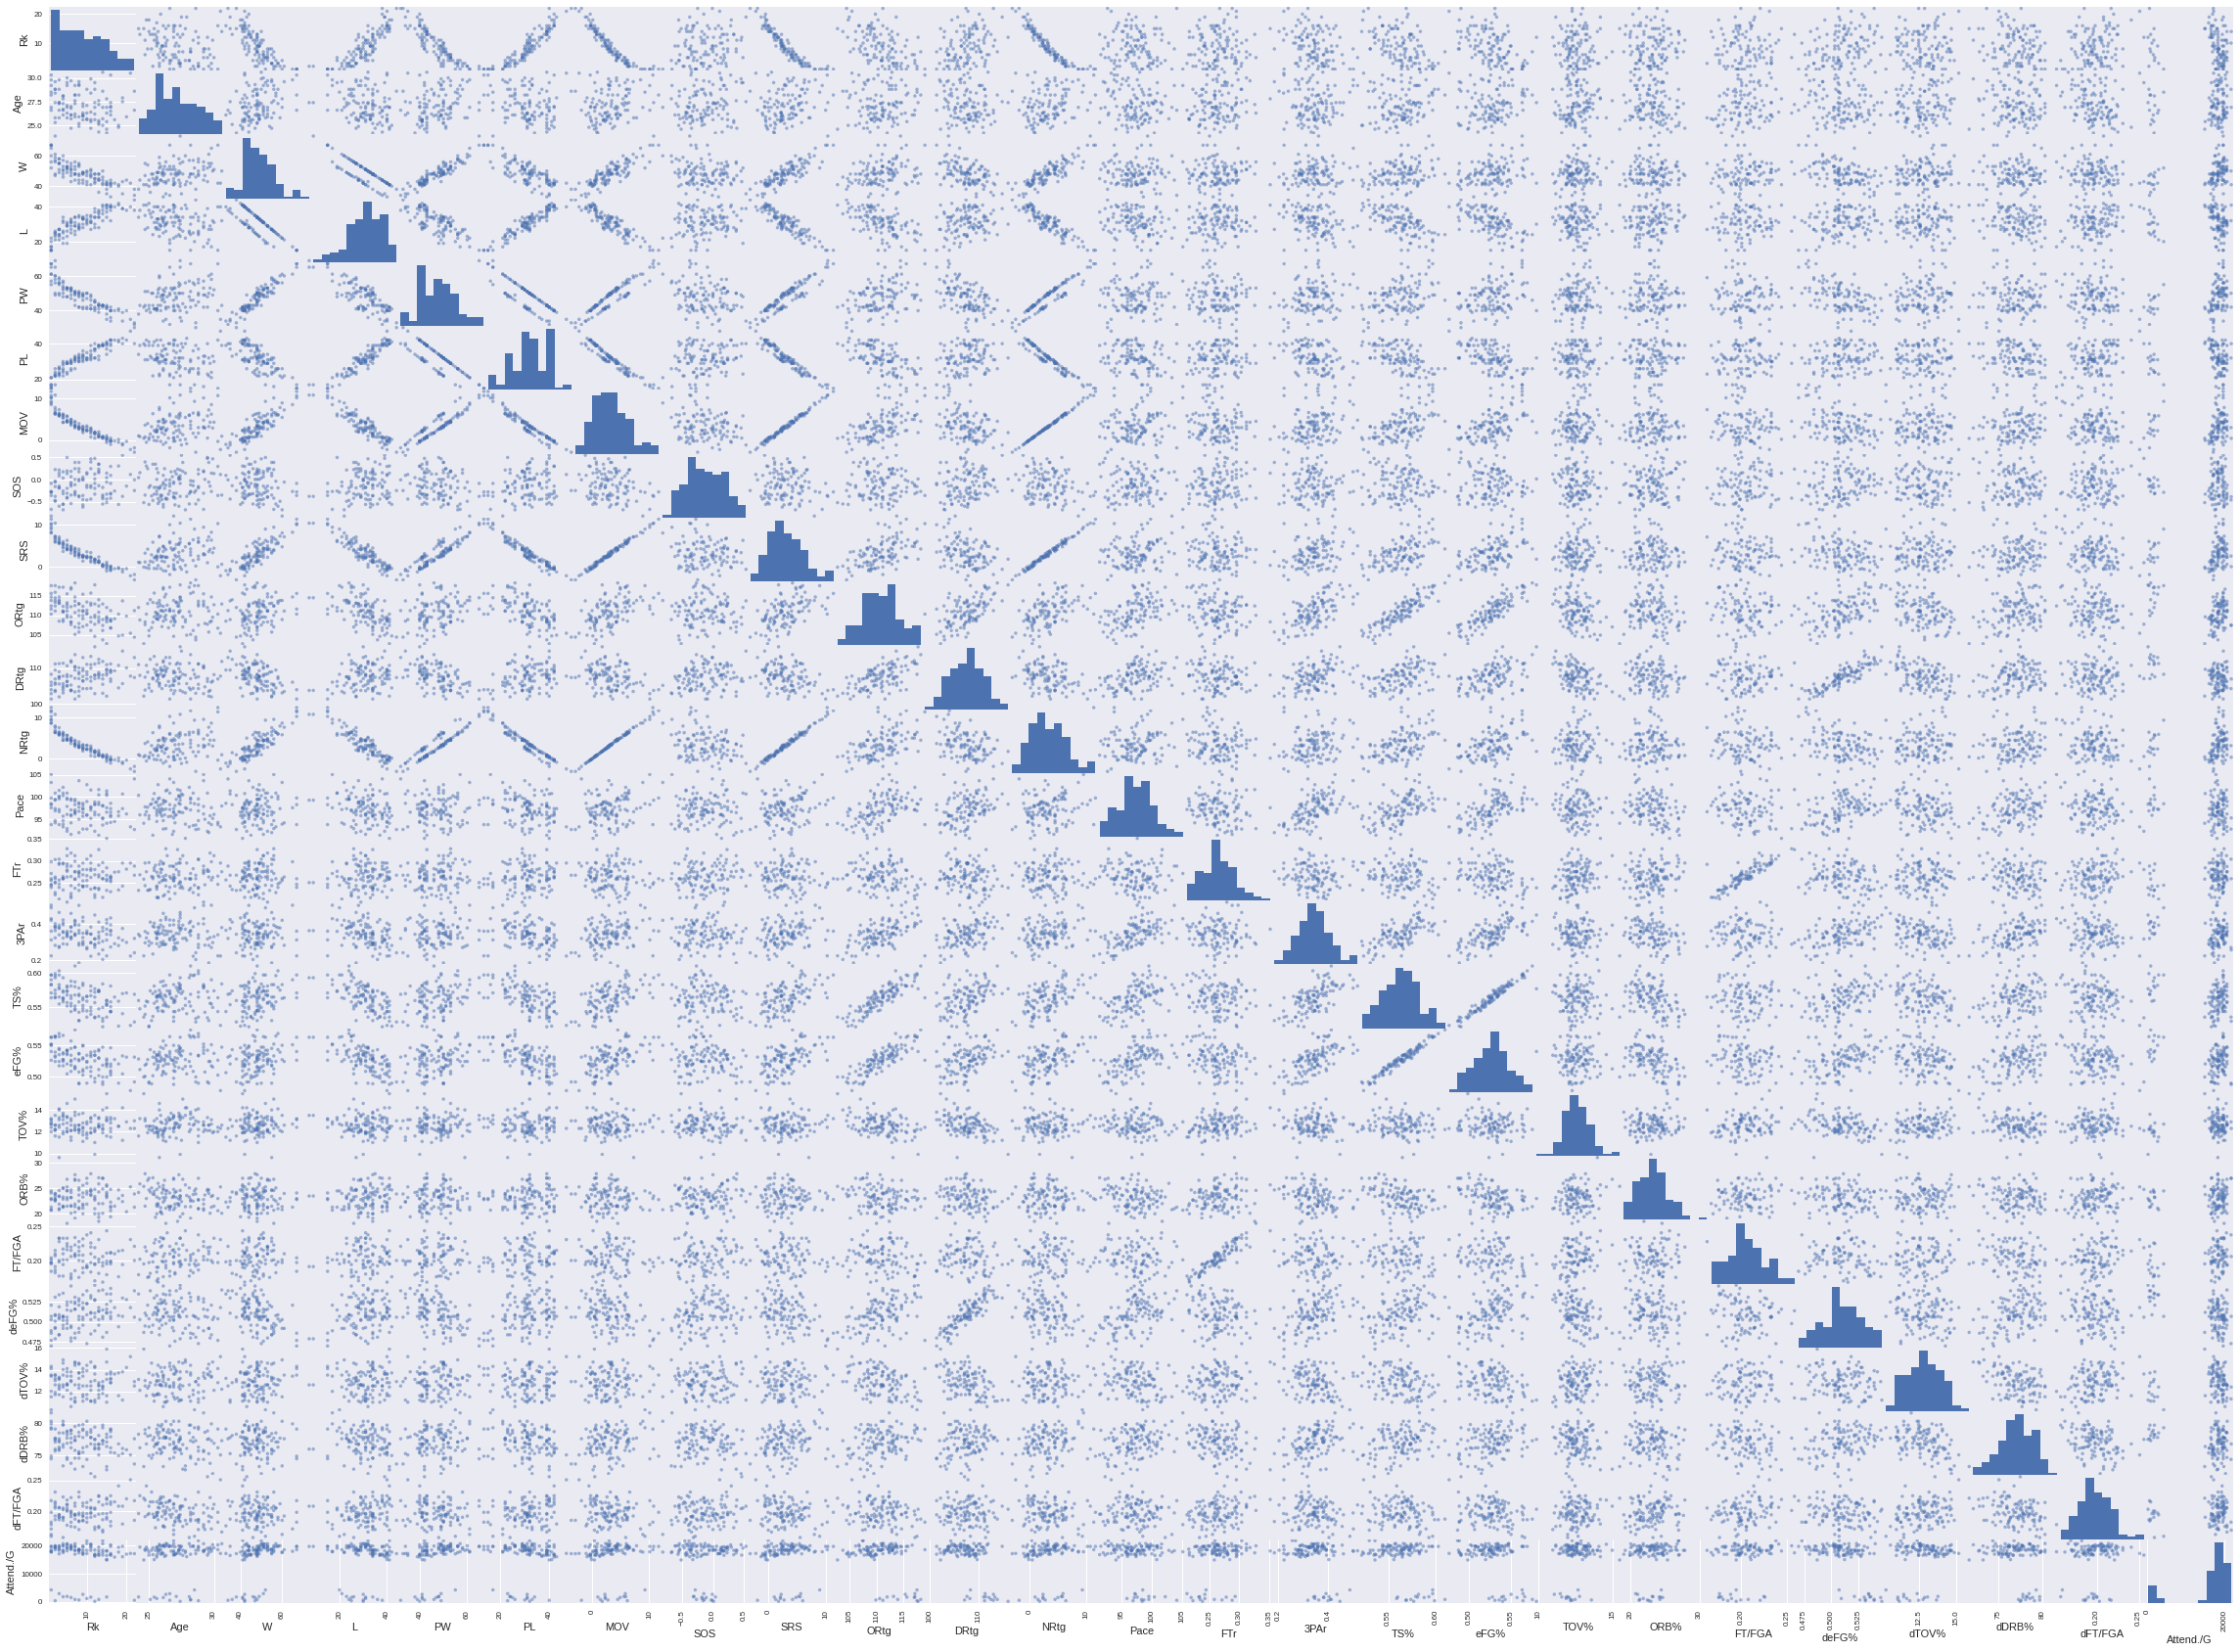

In [495]:
pd.plotting.scatter_matrix(X, figsize=(40,30))
plt.show()